Weihao Li

# MTH9879 Homework 2

Assigned: February 7, 2017.
Due: February 21, 2017 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.


### 0. (0 points) 

Read Chapter 12 of Hasbrouck and Section 6.4 of Foucault, Pagano and R&ouml;ell.


## The Parlour (1998) model

### 1. (10 points) 
Consider the first step $t = 1$ of the 3-step order book case presented in the lecture slides. Suppose that the order book at (or just before) $t = 1$ has one share offered and one share bid ($n_B = n_A = 1$)

Give the probabilities as of a market buy, market sell, limit buy and limit sell at $t = 1$,
You may use my Mathematica notebook *Parlour.nb* as a guide (if you wish).

##### Answer for Question 1  

* The utility function for market sell and market buy order will be: Market sell (MS):$B-\beta_1\,V$ and  Market buy (MB): $\beta_1\,V-A$   as in other time steps.
However, the utility for limit sell and limit buy order will depend on consequtive two market order.    
 Limit sell (LS): $(A-\beta_1\,V)\,{\mathbb{P} }^B_{2}{\mathbb{P} }^B_{3}$           Limit buy  (LB): $(\beta_1\,V-B)\,{\mathbb{P} }^S_{2}{\mathbb{P} }^S_{3}$
 
 
* After the limit order is placed the order book will change to $n_A = 2, n_B = 1$ or $n_A = 1, n_B =2$. Trader at stage 2 will not place limit order (otherwise it wouldn't be filled).  
    So ${\mathbb{P} }^B_{2} = {\mathbb{P} }^B_{3} = 5/22 = {\mathbb{P} }^S_T=\frac{1}{2}\,{\mathbb{P} }\left(\beta_T<\frac{B}{V}\right).$ Which is 5/22 as calculated in the lecture.
    
    
* So by comparing the utility,with parameters given in the lecture, we can get the probabilities.  
  $B - \beta_1\,V > (A-\beta_1\,V)\,{\mathbb{P} }^B_{2}{\mathbb{P} }^B_{3}$ and knowing that probability of doing nothing is 5/22
  
  
* Solve $(5 - \beta_1\,5.5 )> (6-\beta_1\,5.5)\,* {5/22 * 5/22}$ for the probabilities and we get:

 

|      Strategy     | Payoff               |
|:-----------------|:------|
|  Market sell (MS)   |   $1135/5049$   |
|  Limit sell (LS)    |   $22/459$   |
|   Limit buy (LB)    |   $1135/5049$   |
| Market buy (MB)   |   $22/459$   |






















### 2. (4 points) 
Explain why the optimal market/limit order decision depends in general on quantity available on both sides of the order book in the Parlour model.

For clearity let's consider the decision for a seller, and the anaysis for a buyer can be deducted by symmetric.  
* How do orders on ask side influence the seller:  
    if the queue on ask side is large, the propability that the seller will place a limite order will decrease, because there will be smaller chance of being execution. So more chance of market order will be placed and less limite order
* How do order on bid side influence the seller:
    The more offer on bid side will let the buyer place more market order than limit order, thus reduce the length of queue on ask side, thus the seller will have more chance to place limit order than market order. Thus As more orders on bid side, the chance the seller palce limit order will increase. 
    

### Set up R-environment

In [60]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSetup.zip", destfile="ziSetup.zip")
unzip(zipfile="ziSetup.zip")
source("ziSetup.R")

## Cont-Kukanov optimal order placement

### 3. (16 points)

Consider the two BATS exchanges BZX and BYX.  Suppose you are trying to buy shares of MSFT in 3.9 minutes ($1\%$ of the trading day).  Suppose further that the two exchanges have the following characteristics:

**Exchange** | **Make fee** | **Take fee** | **Daily volume** 
-----|-----:|-------:| ---- |
| **(per share)** | **(per share)** | **(shares)** 
BZX | -0.32¢ | +0.30¢ | 10,500,000
BYX | +0.03¢ | -0.03¢ | 1,300,000

Assume the daily volatility of MSFT is $1\%$ and that MSFT is trading at $\$37.50$.

(a) We may suppose that if your order is only partially filled, that's because the price moved away (*adverse selection*).  This suggests that we penalize any under fill of limit orders by $\sigma\,\sqrt{T}$ where $T$ is the order duration.  Compute the corresponding value of $\lambda_u$ in cents per share.

In [61]:
#question a
# set up parameters
price <- 3750
sigma <- 0.01
T <- 0.01
#to make dimention consistent
lambda_u = sigma  * sqrt(T)*price
cat("The lambda U for the price is :",lambda_u)

The lambda U for the price is : 3.75

(b) Assuming a spread of $1$ cent, what are $h$, $f$, and $r$ for BZX and BYX respectively (in cents per share)?

In [62]:
#question b
#confused here, the rebate is positive in the lecture.
#so in this case(bzx) we convert bzx from negtive to positive
#
s = 1
h = s/2
r_bzx =  0.32
f_bzx =  0.30
r_byx = -0.03
f_byx = -0.03
cat("The h,r,f for bzx are :",h,r_bzx,f_bzx,'\n')
cat("The h,r,f for byx are :",h,r_byx,f_byx)

The h,r,f for bzx are : 0.5 0.32 0.3 
The h,r,f for byx are : 0.5 -0.03 -0.03


(c) Assuming no seasonality, what is the mean value $\bar \xi$ of $\xi$ (over 3.9 minutes) for BZX and BYX respectively (in shares)?


In [63]:
#question c
volumn_bzx = 10500000*0.01
volumn_byx = 1300000*0.01
cat("The mean volumn for bzx are :",volumn_bzx,'\n')
cat("The mean volumn for byx are :",volumn_byx)

The mean volumn for bzx are : 105000 
The mean volumn for byx are : 13000


(d)  Assume that $\xi$ is log normally distributed with

$$
\xi = \bar \xi \,\exp\left\{\sigma\,Z-\frac 12\,\sigma^2\right\}.
$$

where $Z \sim N(0,1)$ and $\sigma = 1/2$.  What is the standard deviation of $\xi$ (in terms of $\bar \xi$)?



$$
\begin{align*}
\sigma_{\xi}^2 &= \bar{\xi}^2\left(e^{\sigma^2}-1\right)e^{-\frac{1}{2}2\sigma^2+\sigma^2} \\
&= \bar{\xi}^2\left(e^{\sigma^2}-1\right) \\
\sigma_{\xi}&=\bar{\xi}\sqrt{e^{1/4}-1} \\
\end{align*}
$$


(e) Write R-code to determine the optimal order size $L^\star+Q$ on BZX and BYX respectively. Assume here that you will either trade on BZX or BYX; there is no splitting of the order between the two exchanges. <br>
(Hint: You may find the R function *qnorm(. )* useful).

In [76]:
#R x64 3.3.2
## Might be a typo here? I would use qlnorm.
# as incicated from last question, sigma for volumn is 1/2
best_size <-function(h,r,f,lambda_u,mean_vol,sigma){
    pb = (2*h+f+r)/(h+r+lambda_u)
   
    return(qlnorm(pb,meanlog =log(mean_vol)-1/2*sigma^2,sdlog = sigma))
    
}



bs_bzx <- best_size(h,r_bzx,f_bzx,lambda_u,volumn_bzx,1/2)
bs_byx <- best_size(h,r_byx,f_byx,lambda_u,volumn_byx,1/2)

cat("The optimal order size for bzx is :",bs_bzx,'\n')
cat("The optimal order size for byx is :",bs_byx)


The optimal order size for bzx is : 76887.36 
The optimal order size for byx is : 7834.038




(f) Compare the optimal limit order sizes from part (e) with the ratios of quote sizes and volumes on BZX and BYX.  Are your results from part (e) roughly consistent with observation.  You may assume that the quote sizes shown on the MSFT BATS slides from Lecture 1 are typical.

In [77]:
#R x64 3.3.2
op_ratio_bzx <- bs_bzx/volumn_bzx/100
op_ratio_byx <- bs_byx/volumn_byx/100

#emperiacal ratio from lecture 1
# unlike assumption in the model,the trader place order on different level of price, ranther than the tail of the queue.
#So here we will use average size to represent L+Q:
avgsize_bzx <- mean(c(1700,1558,1300,1100,700,800,900,900,1258,1900))

ep_ratio_bzx <- avgsize_bzx /1078386

avgsize_byx <- mean(c(100,100,100,200,200,100,400,400,200,200))

ep_ratio_byx <- avgsize_byx /310861

cat("The optimal ratio for bzx is :",op_ratio_bzx,'\n')
cat("The emperical ratio for bzx is :",ep_ratio_bzx,'\n')

cat("The optimal ratio for byx is :",op_ratio_byx,'\n')
cat("The emperical ratio for byx is :",ep_ratio_byx )

# They does not look very similar

The optimal ratio for bzx is : 0.007322606 
The emperical ratio for bzx is : 0.001123531 
The optimal ratio for byx is : 0.006026183 
The emperical ratio for byx is : 0.0006433744

## The Bouchaud-M&eacute;zard-Potters order book approximation

### 4. (16 points)

When $\lambda(u)=\alpha$,  a constant, the BMP order density becomes

\begin{eqnarray*}
\rho_{BMP}(\Delta) &=& \frac{\alpha}{\delta}\,\left\{e^{-\Delta/{\tilde \Delta}}\,\int_0^{\Delta/{\tilde\Delta}}\,\sinh(u)\,du + \sinh(\Delta/{\tilde \Delta})\,\int_{\Delta/{\tilde\Delta}}^\infty\,e^{-u}\,du\right\} \\
&=&\frac{\alpha}{\delta}\,\left\{1 - e^{-\Delta/{\tilde \Delta}}  \right\}
\end{eqnarray*}

where the characteristic distance

$$
\tilde \Delta=\sqrt{\frac{\sigma^2}{2\,\delta}}.
$$

(a) Amend the SFGK zero intelligence code from Problem 3 of HW1 to count the number of limit orders generated in addition to computing the average book shape.



In [78]:
#R x64 3.3.2

 
# turned off the logging and set up parameters
logging <- F
lb_count <<- 0
ls_count <<- 0
#Buy limit order
limitBuyOrder <- function(price=NA){
  lb_count<<-lb_count + 1
  if (is.na(price))
  {prx <<- (bestOffer()-pick(L))}
  else prx <<-price  
  if(logging==T){eventLog[count,]<<- c("LB",prx)} 
  book$buySize[book$Price==prx]<<-book$buySize[book$Price==prx]+1} 

#Sell limit order
limitSellOrder <- function(price=NA){
   ls_count <<- ls_count + 1
  if (is.na(price))
  {prx <<- (bestBid()+pick(L))}
  else prx <<-price  
  if(logging==T){eventLog[count,] <<- c("LS",prx)}  
 book$sellSize[book$Price==prx]<<-book$sellSize[book$Price==prx]+1} 
 
    ordercount_setup<-function(){
     lb_count <<- 0
     ls_count <<- 0
 }


(b) With $\alpha = 1$, $\mu = 10$ and $\delta = \frac15$, simulate 100,000 events and plot the resulting average book shape in red (in a band $\pm 20$ around the mid price).

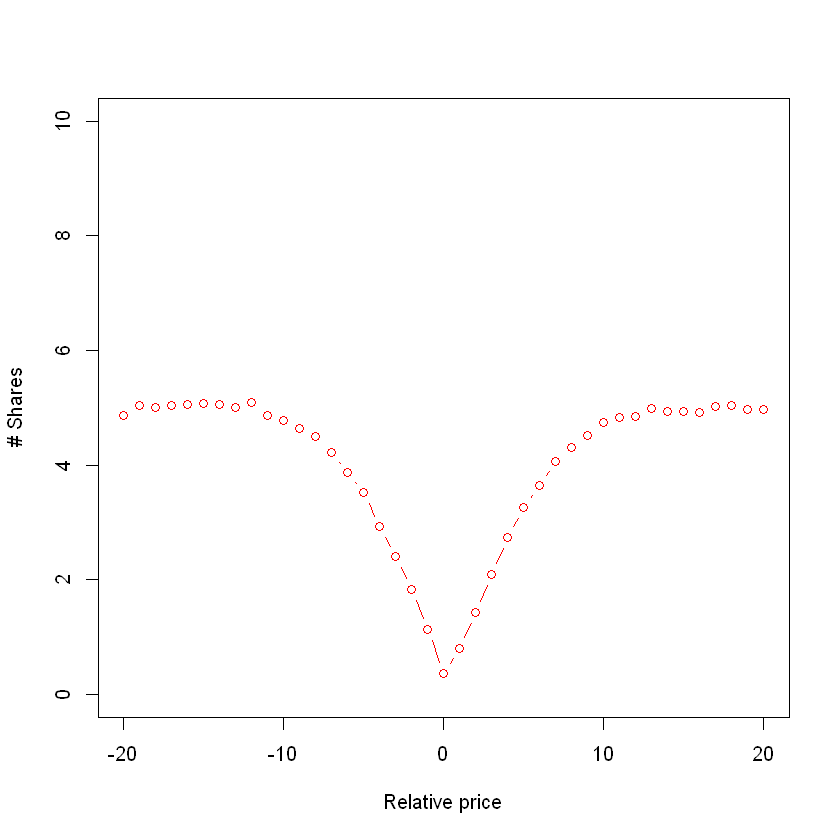

In [79]:
#R x64 3.3.2
#code from last homework with trival modifications
 numEvents <- 100000
ordercount_setup()
initializeBook5()

# turned off the logging and set up parameters
logging <- F
alpha <<- 1
mu  <<- 10
delta <<- 1.0/5
#save data into the avgBookShape
#each row is a book shape



#set up the beginning state
for(count in 1:100){
    generateEvent()
    }
    
#begin simulation
   
    
    BookShape_Temp <- bookShape(20)/numEvents
    #compute the simulated price 
    for(count in 2:numEvents){
      generateEvent()
      BookShape_Temp <- BookShape_Temp + bookShape(20)/numEvents
    }
    
plot(-20:20,BookShape_Temp,main=NA,xlab="Relative price",ylab="# Shares", col='red', type='b',ylim=c(0, 10))
    



<font color=red> COMMENT: why such a large ylim? </font>

(c) From your simulation, what is the probability $P_L$ of a limit order at a given level conditional on an event? (Recall that there are 60 limit order levels in the simulation).

In [80]:
#R x64 3.3.2
limit_total <- lb_count + ls_count
PL = limit_total/numEvents/(L*2)
cat("The probability of limit order is :",PL)

The probability of limit order is : 0.008339333


(d) In [Gatheral and Oomen]<sup id="cite_ref-GO" class="reference"><a href="#cite_note-GO"><span>[</span>1<span>]</span></a></sup>, with these SFGK parameters, realized variance per event was estimated as

$$
\sigma^2_{GO} = 0.083.
$$

Using your estimate $P_L$ of limit orders per level per event, convert this estimate to variance per limit order (recall that $\alpha=1$).  Denote your result by $\sigma^2_{GO}$.  Compute the characteristic distance $\tilde \Delta_{GO}$ with this estimate $\sigma^2_{GO}$.

In [81]:
#By dimentional analysis, we change var/even to var /limit order. It indicates that we should devide it by PL 

var_GO = 0.083/PL
distance_GO <-sqrt(var_GO/(2*delta))
cat("The characteristic distance is :",distance_GO)

The characteristic distance is : 4.988195

(e) In Lecture 1, using dimensional analysis, we estimated that variance $\sigma^2_{DA}$ per unit time should be of the order of

$$
\sigma^2_{DA} = \frac{\mu^2\,\delta}{\alpha^2}.
$$

Compute the characteristic distance $\tilde \Delta_{DA}$ with this estimate $\sigma^2_{DA}$.

In [82]:
#R x64 3.3.2
#Question e
var_DA <- mu^2*delta/alpha^2
distance_DA <-sqrt(var_DA/(2*delta))
cat("The characteristic distance is :",distance_DA)

The characteristic distance is : 7.071068

(f)  Using your two estimates of $\tilde \Delta$ from parts (d) and (e),  write functions to compute the corresponding order book densities $\rho_{GO}(\Delta)$ and $\rho_{DA}(\Delta)$.


In [83]:
#From lecture
Rho_BMP <- function(d,cDist) { alpha/delta*(1-exp(-abs(d)/cDist)) }



(g)
Superimpose plots of the asymptotic densities $\rho_{DA}(\Delta)$ (in blue) and $\rho_{DA}(\Delta)$ (in orange) on your plot of the average book shape.

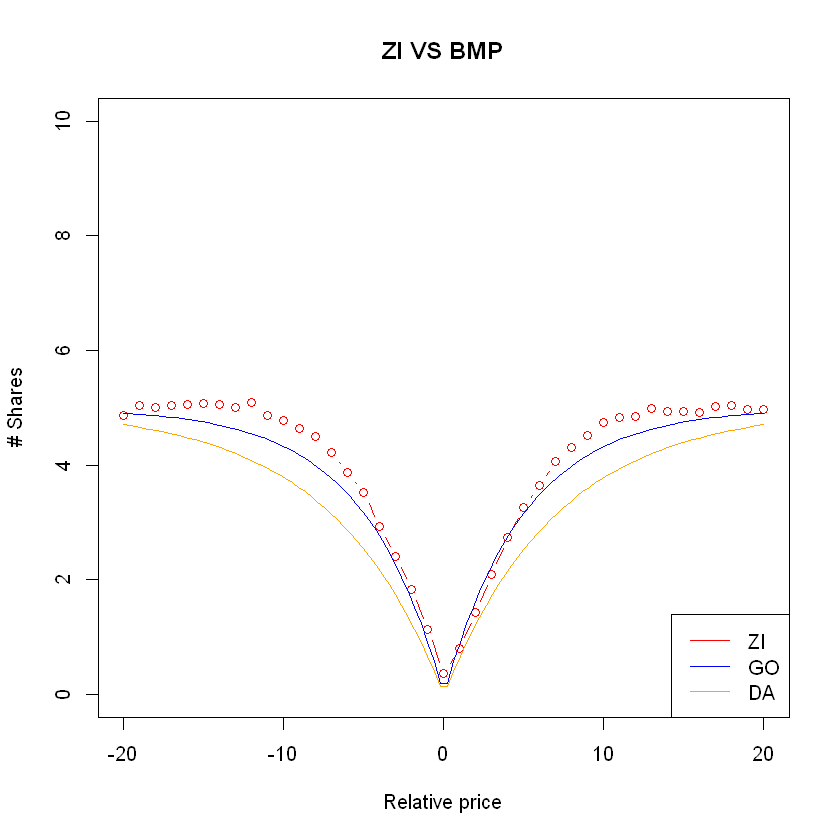

In [84]:
plot(-20:20,BookShape_Temp,main="ZI VS BMP",xlab="Relative price",ylab="# Shares", col='red', type='b',ylim=c(0, 10))   
curve(Rho_BMP(x,distance_DA),from=-20,to=20,n=100,col="orange",add= TRUE)
curve(Rho_BMP(x,distance_GO),from=-20,to=20,n=100,col="blue",add= TRUE)
legend('bottomright', legend=c('ZI','GO','DA'), lty=c(1, 1,1), col=c('red', 'blue','orange'))

### 5. (6 points)

Another of Mike and Farmer's observations is that the distribution of marketable as well as unmarketable limit orders as a function of distance $\Delta$ to the same-side best quote is well-described by a Student-$t$ distribution.  Assume $\mu=1/2$ as above.


(a) Derive an expression in terms of the Student-$t$ cumulative density function for the ratio of arrival rates of limit to market orders as a function of the spread $s$.  How does this ratio vary with $s$?

In buyer's condition
* The probability of arraival of limit order should be positive correlated to the spread s. Because the spread increase,because of lower cost. So the arrival rate of  limit order can be expressed as $F(s)$. In the contrary, market order will be $1-F(s) = F(-s)$
* And the ratio of probability of placing limit order and market order will be $$\frac{F(s)}{F(-s)}$$ which implied that as s increase, there will be more limit order than market order.

(b) Relative to the zero-intelligence model, does this empirically observed strategic behavior make the spread revert faster or more slowly?

#### Faster 
* In the ZI model, the event and spread are independent. There is no mean reversion pattern from the ZI model.
* In this case, when the spread is larger, more marketable limit order will be place,narrowing the spread. When spread is small, 
more market orders will be placed, expanding the spread. So the spread will convert between a mean value. 

### References

<div class="reflist" style="list-style-type: decimal;">

<ol>

  <li id="cite_note-GO"><span class="mw-cite-backlink"><b><a href="#cite_ref-GO">^</a></b></span> Jim Gatheral and Roel C. A Oomen, Zero-intelligence realized variance estimation, <span>*Finance and Stochastics*,</span> <span>**14**</span>(2) 249–283, 2010.</li>

</ol>